# EDA classification

aim: When will a project succeed?
Which features influence the success of a project?


#### assumptions
 * the higher the goal, the lower the probability for success
 * the longer the duration the higher the probability for success
 * the longer the preparation time the higher the probability for success
 * the month of launch influences the probability for success
 * the country influences the probability for success
 * pledged amount per backer influences the probability for success

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read dataframe in
df = pd.read_csv('data/kickstarter_preprocess.csv')

In [3]:
# first summary
df.shape

(177594, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177594 entries, 0 to 177593
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   backers_count       177594 non-null  int64  
 1   country             177594 non-null  object 
 2   goal                177594 non-null  float64
 3   staff_pick          177594 non-null  bool   
 4   state               177594 non-null  object 
 5   usd_pledged         177594 non-null  int64  
 6   blurb_len_c         177594 non-null  int64  
 7   blurb_len_w         177594 non-null  int64  
 8   slug_len_c          177594 non-null  int64  
 9   slug_len_w          177594 non-null  int64  
 10  cat_in_slug         177594 non-null  int64  
 11  category_parent_id  177594 non-null  int64  
 12  category_id         177594 non-null  int64  
 13  category_name       177594 non-null  object 
 14  created_year        177594 non-null  int64  
 15  created_month       177594 non-nul

In [5]:
df.describe()

,backers_count,goal,usd_pledged,blurb_len_c,blurb_len_w,slug_len_c,slug_len_w,cat_in_slug,category_parent_id,category_id,...,created_month,deadline_year,deadline_month,launched_year,launched_month,duration_days,preparation,pledged_per_backer,rel_pledged_goal,filled_parent
count,177594.000000,1.775940e+05,1.775940e+05,177594.000000,177594.000000,177594.000000,177594.000000,177594.000000,177594.000000,177594.000000,...,177594.000000,177594.000000,177594.000000,177594.000000,177594.000000,177594.000000,177594.000000,177594.000000,177594.00,177594.000000
mean,133.933235,4.432000e+04,1.160979e+04,112.704686,18.985664,32.232722,5.439159,0.027991,11.224985,175.791997,...,6.325338,2015.519483,6.716680,2015.453929,6.425983,32.588911,45.846335,102.141548,inf,11.799408
std,873.467409,1.164773e+06,8.178030e+04,26.499148,5.018800,13.674400,2.456352,0.164947,5.930284,134.355470,...,3.363491,1.948451,3.362396,1.943886,3.349536,11.820564,127.104232,1086.051948,NaN,5.624576
min,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,2009.000000,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.00,1.000000
25%,3.000000,1.500000e+03,7.000000e+01,102.000000,16.000000,21.000000,3.000000,0.000000,9.000000,37.000000,...,3.000000,2014.000000,4.000000,2014.000000,4.000000,29.000000,2.000000,18.000000,1.30,10.000000
50%,23.000000,5.000000e+03,1.260000e+03,124.000000,20.000000,32.000000,5.000000,0.000000,12.000000,252.000000,...,6.000000,2016.000000,7.000000,2015.000000,6.000000,30.000000,10.000000,44.000000,100.50,12.000000
75%,80.000000,1.433195e+04,5.905000e+03,132.000000,22.000000,46.000000,7.000000,0.000000,16.000000,302.000000,...,9.000000,2017.000000,10.000000,2017.000000,9.000000,34.000000,35.000000,85.000000,120.21,16.000000
max,105857.000000,1.523501e+08,8.596474e+06,196.000000,35.000000,121.000000,25.000000,1.000000,26.000000,389.000000,...,12.000000,2019.000000,12.000000,2019.000000,12.000000,93.000000,3303.000000,356373.000000,inf,26.000000


In [6]:
df.head()

,backers_count,country,goal,staff_pick,state,usd_pledged,blurb_len_c,blurb_len_w,slug_len_c,slug_len_w,...,deadline_year,deadline_month,launched_year,launched_month,duration_days,preparation,pledged_per_backer,rel_pledged_goal,filled_parent,parent_name
0,47,US,1000.00,False,successful,1950,125,22,23,4,...,2017,9,2017,8,30,8,41,195.00,12,Games
1,271,US,15000.00,False,successful,22404,108,15,46,7,...,2013,6,2013,5,30,224,82,149.36,14,Music
2,3,GB,12160.66,False,failed,165,133,23,32,7,...,2017,3,2017,1,59,5,45,1.36,12,Games
3,3,US,2800.00,False,successful,2820,121,24,40,7,...,2013,1,2012,12,30,4,940,100.71,18,Publishing
4,35,US,3500.00,False,successful,3725,134,18,31,4,...,2015,5,2015,4,30,159,106,106.43,14,Music


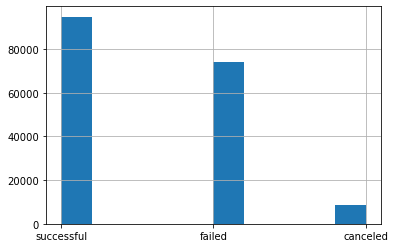

In [7]:
# overview how many projects were successful, failed, canceled
df['state'].hist();

In [8]:
# make three new dataframes: one for success, one for failed and the last for canceled
df_suc = df.query('state == "successful"')
df_fai = df.query('state == "failed"')
df_can = df.query('state == "canceled"')

### assumption 1: the higher the goal, the lower the probability for success

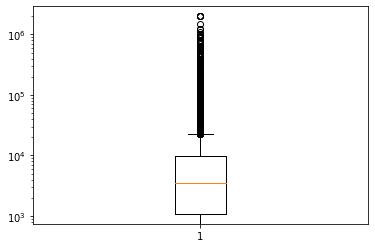

In [9]:
plt.boxplot(df_suc['goal'])
plt.yscale('log');

In [10]:
df_suc.query('goal < 1').shape

(18, 26)

In [11]:
df_suc.query('goal >= 500000').shape

(49, 26)

In [12]:
# remove outlier
#df_suc.drop(df_suc[df_suc['goal'] > 100000].index, inplace=True)

In [13]:
df_suc1 = df_suc.query('goal <= 1500')
#plt.boxplot(df_suc1['goal'])
df_suc1.shape

(29467, 26)

In [14]:
df_suc2 = df_suc.query('1500 < goal < 7000')
#plt.boxplot(df_suc2['goal'])
df_suc2.shape

(35129, 26)

In [15]:
df_suc3 = df_suc.query('goal >= 7000')
#plt.boxplot(df_suc3['goal'])
df_suc3.shape

(30182, 26)

In [16]:
df_fai1 = df_fai.query('goal <= 1500')
df_fai1.shape

(13763, 26)

In [17]:
df_fai2 = df_fai.query('1500 < goal < 7000')
df_fai2.shape

(22526, 26)

In [18]:
df_fai3 = df_fai.query('goal >= 7000')
df_fai3.shape

(37909, 26)

In [19]:
df_can1 = df_can.query('goal <= 1500')
df_can1.shape

(1656, 26)

In [20]:
df_can2 = df_can.query('1500 < goal < 7000')
df_can2.shape

(2502, 26)

In [21]:
df_can3 = df_can.query('goal >= 7000')
df_can3.shape

(4460, 26)

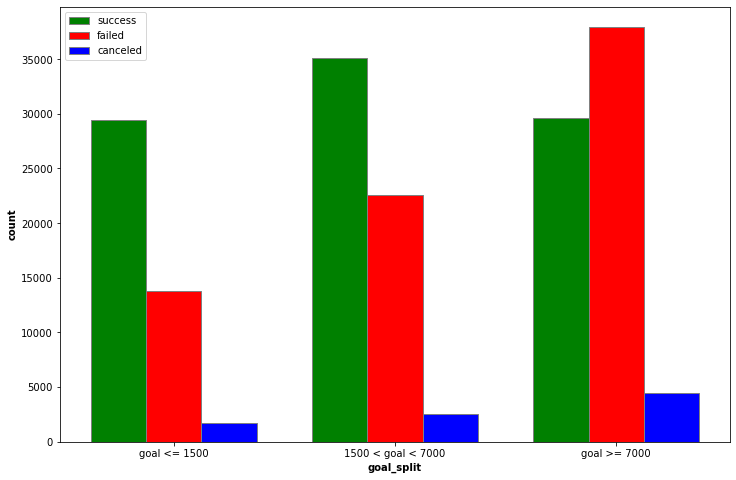

In [22]:
# making a categorical variable for goal 0='goal <= 1500' 1='1500 < goal < 7000', 2='goal >= 7000'
#df.loc[df['goal'] <= 1500, 'goal_split'] = 0
#df.loc[(df['goal'] > 1500) & (df['goal'] < 7000), 'goal_split'] = 1
#df.loc[df['goal'] >= 7000, 'goal_split'] = 2
#sns.barplot(x='goal_split', y=None, hue="state", data=df)

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# set height of bar 
suc = [29467, 35129, 29650] 
fai = [13763, 22526, 37909] 
can = [1656, 2502, 4460]

# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]

p1 = plt.bar(br1, suc, color ='g', width = barWidth, 
        edgecolor ='grey', tick_label ='success') 
p2 = plt.bar(br2, fai, color ='r', width = barWidth, 
        edgecolor ='grey', tick_label ='failed') 
p3 = plt.bar(br3, can, color ='b', width = barWidth, 
        edgecolor ='grey', tick_label ='canceled')

# Adding Xticks  
plt.xlabel('goal_split', fontweight ='bold') 
plt.ylabel('count', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(3)], 
           ['goal <= 1500', '1500 < goal < 7000', 'goal >= 7000'])
plt.legend((p1[0], p2[0], p3[0]), ('success', 'failed', 'canceled'))

plt.show()

#df1 = df.query('goal <= 1500')
#df2 = df.query('1500 < goal < 7000')
#df3 = df.query('goal >= 7000')

## conclucsion
the lower the goal the higher the probability for success

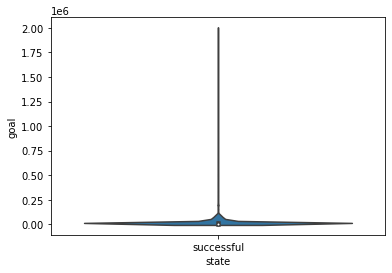

In [23]:
sns.violinplot(x ="state", y ="goal", data = df_suc);

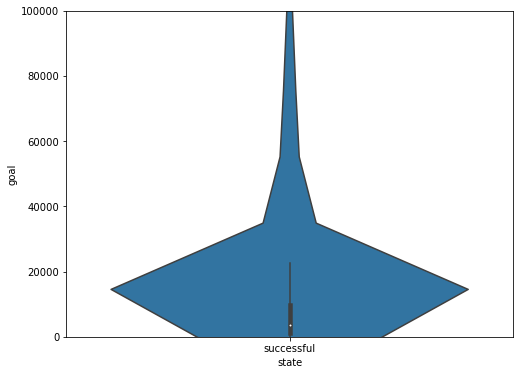

In [24]:
var1 = 'state'
data1 = pd.concat([df_suc['goal'], df_suc[var1]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig1 = sns.violinplot(x=var1, y="goal", data=data1, scale="count")
fig1.axis(ymin=0, ymax=100000);
#plt.yscale('log')

In [25]:
df.query('goal <= 1').shape

(239, 26)

In [26]:
df.query('goal >= 1000000').shape

(660, 26)

In [27]:
df.query('goal >= 1000000 and state == "successful"').shape

(12, 26)

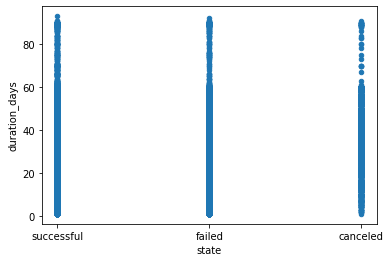

In [28]:
sta_dur = df.plot(x='state', 
                y='duration_days', 
                kind='scatter')

### assumption 2: the longer the duration the higher the probability for success

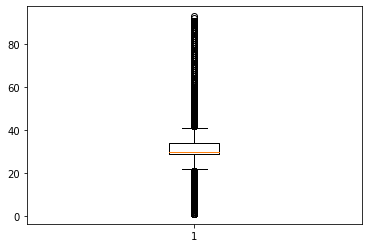

In [29]:
plt.boxplot(df['duration_days']);

In [30]:
dur = [df.query('duration_days <= 20').shape, df.query('20 < duration_days <= 30').shape, 
        df.query('30 < duration_days <= 40').shape, df.query('duration_days > 40').shape]
dur

[(18855, 26), (102794, 26), (24795, 26), (31150, 26)]

In [31]:
dur1 = [df_suc.query('duration_days <= 20').shape, df_suc.query('20 < duration_days <= 30').shape,
        df_suc.query('30 < duration_days <= 40').shape, df_suc.query('duration_days > 40').shape]
dur1

[(12052, 26), (55097, 26), (15513, 26), (12116, 26)]

In [32]:
dur2 = [df_fai.query('duration_days <= 20').shape, df_fai.query('20 < duration_days <= 30').shape,
        df_fai.query('30 < duration_days <= 40').shape, df_fai.query('duration_days > 40').shape]
dur2

[(6150, 26), (43036, 26), (8119, 26), (16893, 26)]

In [33]:
dur3 = [df_can.query('duration_days <= 20').shape, df_can.query('20 < duration_days <= 30').shape,
        df_can.query('30 < duration_days <= 40').shape, df_can.query('duration_days > 40').shape]
dur3

[(653, 26), (4661, 26), (1163, 26), (2141, 26)]

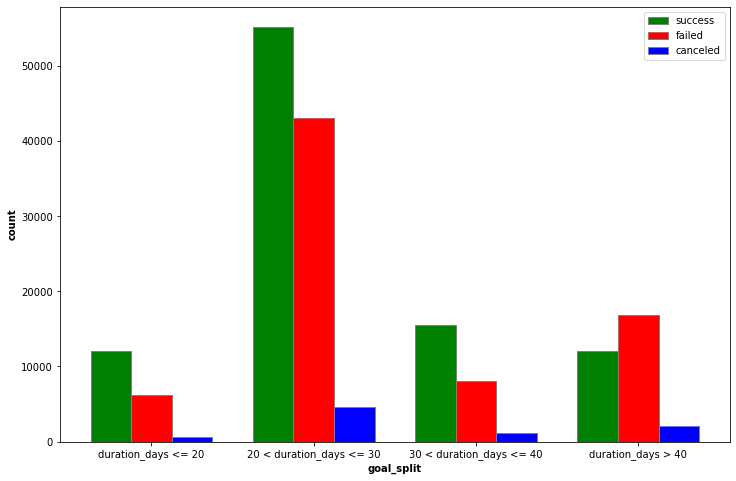

In [34]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# set height of bar 
suc = [12052, 55097, 15513, 12116] 
fai = [6150, 43036, 8119, 16893] 
can = [653, 4661, 1163, 2141]

# Set position of bar on X axis 
br1 = np.arange(4) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]

p1 = plt.bar(br1, suc, color ='g', width = barWidth, 
        edgecolor ='grey', tick_label ='success') 
p2 = plt.bar(br2, fai, color ='r', width = barWidth, 
        edgecolor ='grey', tick_label ='failed') 
p3 = plt.bar(br3, can, color ='b', width = barWidth, 
        edgecolor ='grey', tick_label ='canceled')

# Adding Xticks  
plt.xlabel('goal_split', fontweight ='bold') 
plt.ylabel('count', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(4)], 
           ['duration_days <= 20', '20 < duration_days <= 30', '30 < duration_days <= 40', 'duration_days > 40'])
plt.legend((p1[0], p2[0], p3[0]), ('success', 'failed', 'canceled'))

plt.show()

### assumption 3: the longer the preparation time the higher the probability for success

### assumption 4: the month of launch influences the probability for success

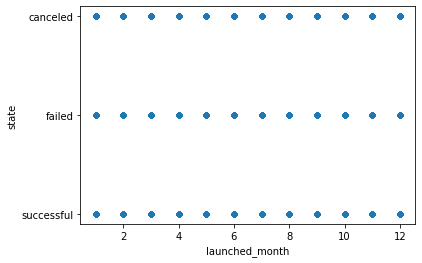

In [35]:
sta_month = df.plot(x='launched_month', 
                y='state', 
                kind='scatter')

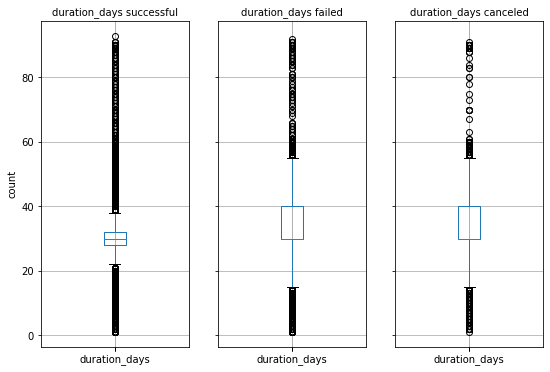

In [36]:
# boxplot sqft_living (small houses, big houses, bad neighborhood)
fig, axes = plt.subplots(ncols=3,sharex=True,sharey=True,figsize=(9,6))

ax1 = df_suc.boxplot(column=['duration_days'],ax=axes[0])
ax1.set_title("duration_days successful", fontsize = 10)
ax1.set_ylabel("count");
ax2 = df_fai.boxplot(column=['duration_days'],ax=axes[1])
ax2.set_title("duration_days failed", fontsize = 10);
ax3 = df_can.boxplot(column=['duration_days'],ax=axes[2]);
ax3.set_title("duration_days canceled", fontsize = 10);

In [37]:
df_suc['duration_days'].mean(), df_suc['duration_days'].median()

(30.850482179408722, 30.0)

In [38]:
df_fai['duration_days'].mean(), df_fai['duration_days'].median()

(34.49409687592657, 30.0)

In [39]:
df_can['duration_days'].mean(), df_can['duration_days'].median()

(35.3045950336505, 30.0)

In [40]:
df.groupby('state').count()['successful']

KeyError: 'successful'

### assumption 5: the country influences the probability for success

In [ ]:
cou_suc = df_suc.groupby(['country'])['country'].count()
cou_fai = df_fai.groupby(['country'])['country'].count()
cou_can = df_can.groupby(['country'])['country'].count()
pd.merge(cou_suc, cou_fai, cou_can, on=['country'],suffixes=[' successful', ' failed', ' canceled'])
#df['country'].unique()

In [ ]:
cou_can

In [ ]:
fig, axes = plt.subplots(ncols=3,sharex=True,sharey=True,figsize=(15,6))

ax1 = cou_suc.hist(column=['country'],ax=axes[0])
axes[0].set_title('country successful')
axes[0].set_xlabel('country')
axes[0].set_ylabel('count')


ax2 = cou_fai.hist(column=['country'],ax=axes[1])
axes[1].set_title('country failed')
axes[1].set_xlabel('country')
axes[1].set_ylabel('count')


ax3 = cou_can.hist(column=['country'],ax=axes[2])
axes[2].set_title('country canceled')
axes[2].set_xlabel('country')
axes[2].set_ylabel('count');

In [ ]:
cou_suc.plot(kind='bar');

In [ ]:
cou_fai.plot(kind='bar');

In [ ]:
cou_can.plot(kind='bar');

In [ ]:
cou = df_suc.groupby('country')['country'].count()
cou = list(cou)

cou1 = df['country'].unique()

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(cou, labels = cou1) 
  
# show plot 
plt.show() 

In [ ]:


country_suc = df_suc.groupby(df_suc['country'])
#pledged = amt_pledged.sum().sort_values(ascending=0)[0:10]


ax = country_suc.plot(kind="bar")
ax.set_title("Amount by Country")
ax.set_ylabel("Amount")
ax.set_xlabel("Country")
vals = ax.get_yticks()

### assumption 6: pledged amount per backer influences the probability for success

In [ ]:
df.groupby('state').pledged_per_backer.mean()

In [ ]:
df_suc.groupby('staff_pick').count()

In [ ]:
df_fai.groupby('staff_pick').count()

In [ ]:
df_can.groupby('staff_pick').count()

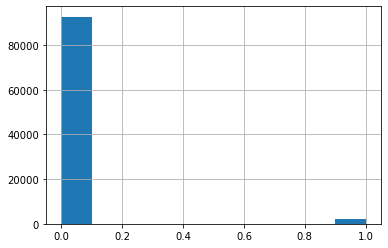

In [47]:
df_suc['cat_in_slug'].hist()

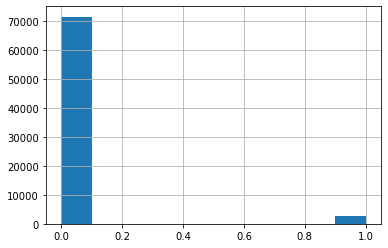

In [48]:
df_fai['cat_in_slug'].hist()

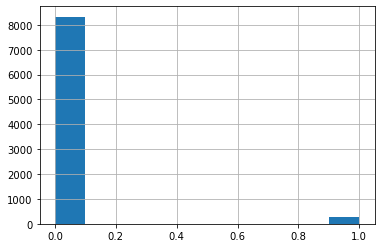

In [49]:
df_can['cat_in_slug'].hist()

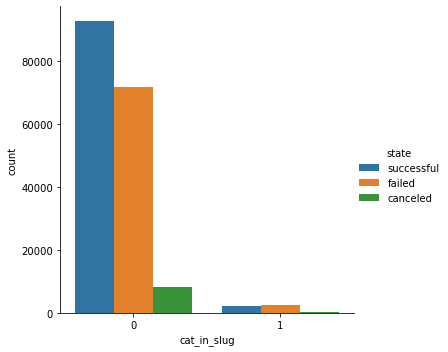

In [69]:
sns.catplot(x = "cat_in_slug", kind = 'count', hue="state", data=df);
#sns.barplot(x='cat_in_slug', hue='state', data=df)
#df.groupby('cat_in_slug').plot(x='state', kind='bar')